## <center> How to Using a Public API with Python | Automating Crypto Website API Pull Using Python</center>

### API: It basically acts as an intermediary between two different applications that want to talk to each other.
### An API typically has a client and a server and so the application or the person that is submitting the request that is the client and then the server is the application that is sending the response to that request.   

### Let's start 

### 1- open CoinMarketCap website
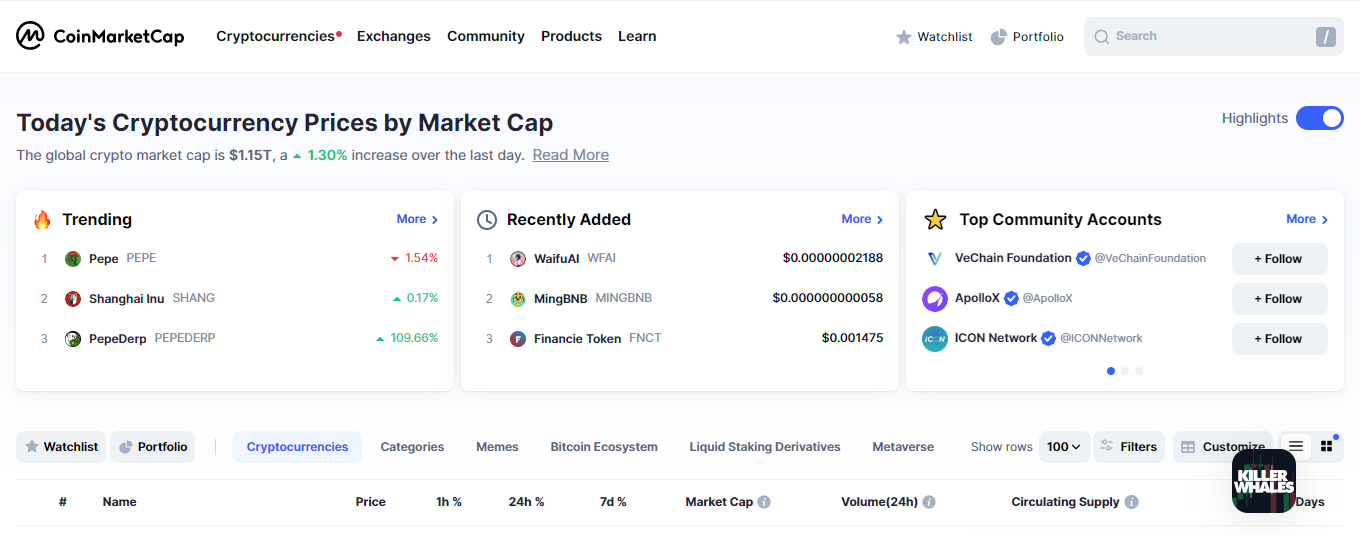 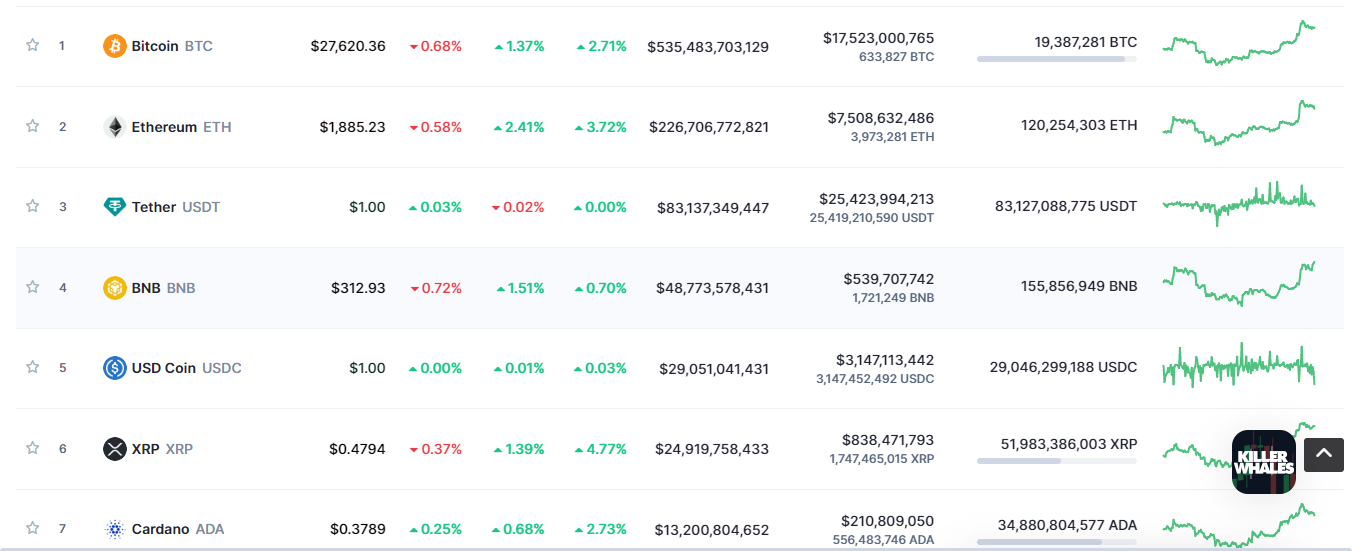

### 2- Go down to "products service" then to "Crypto API"
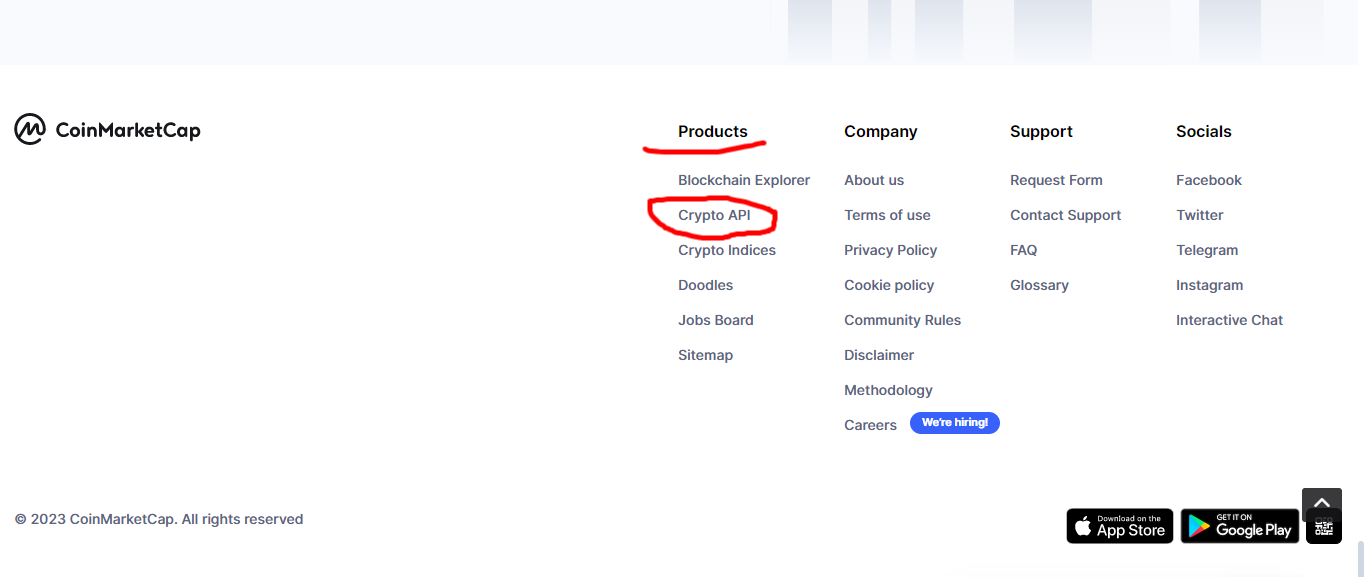

### Then  press on "get your API key now"

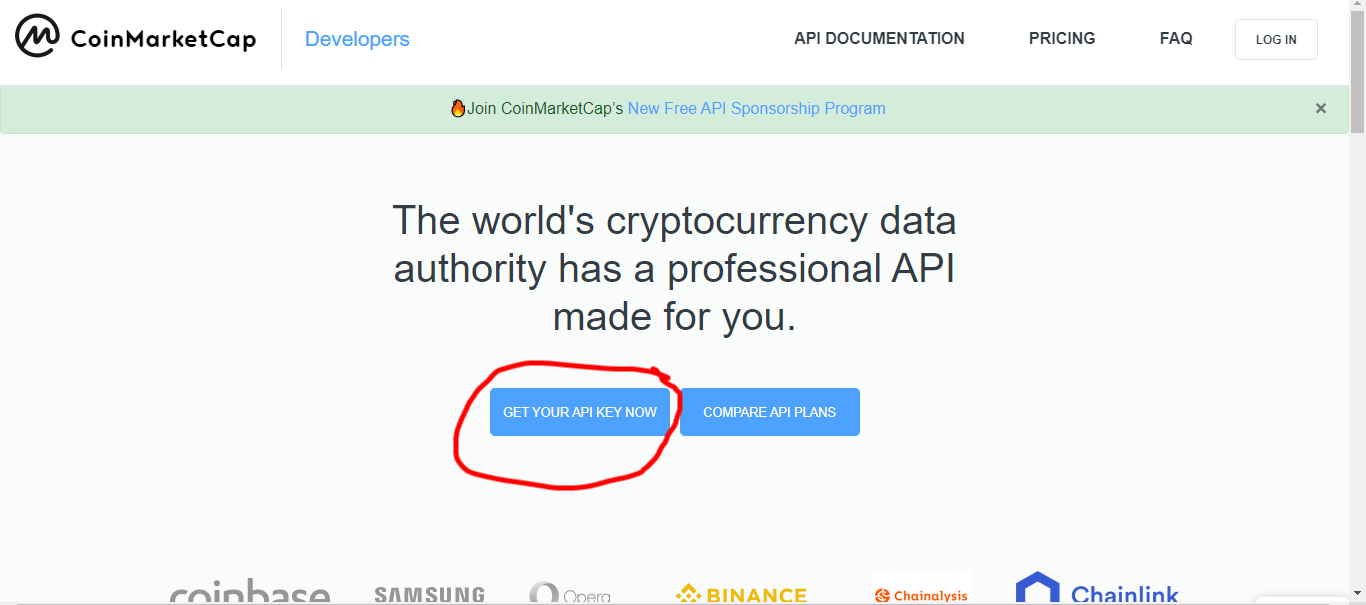

### 3- Create an account on CoinMarketCap website

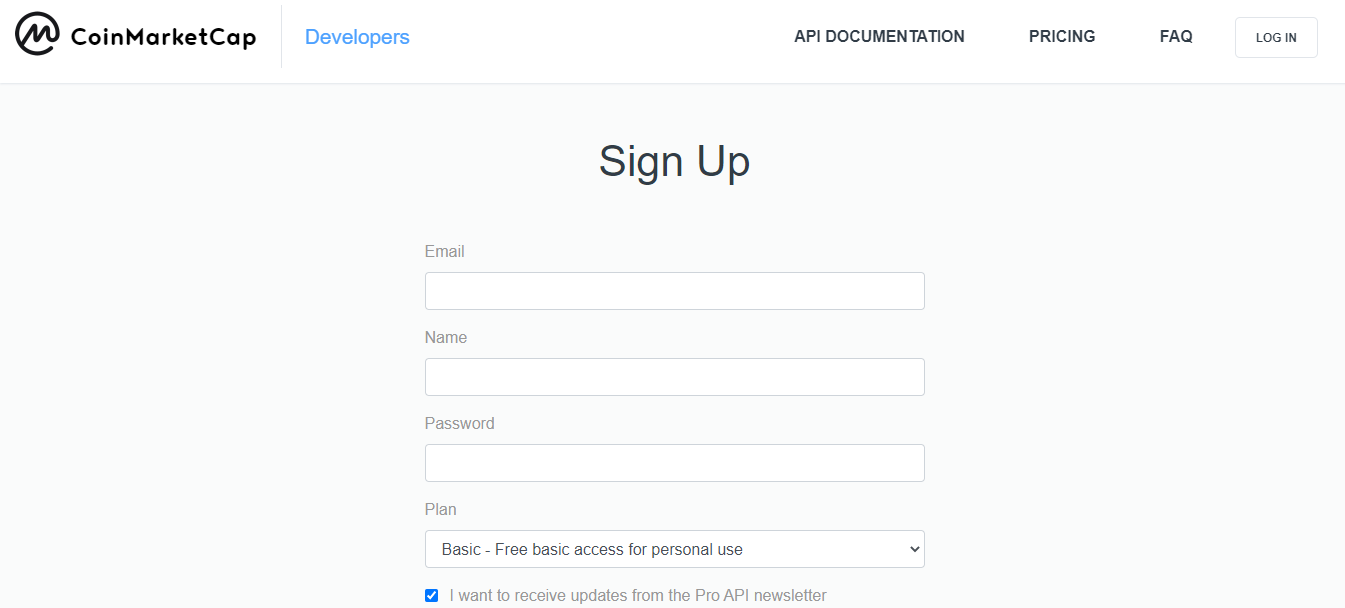

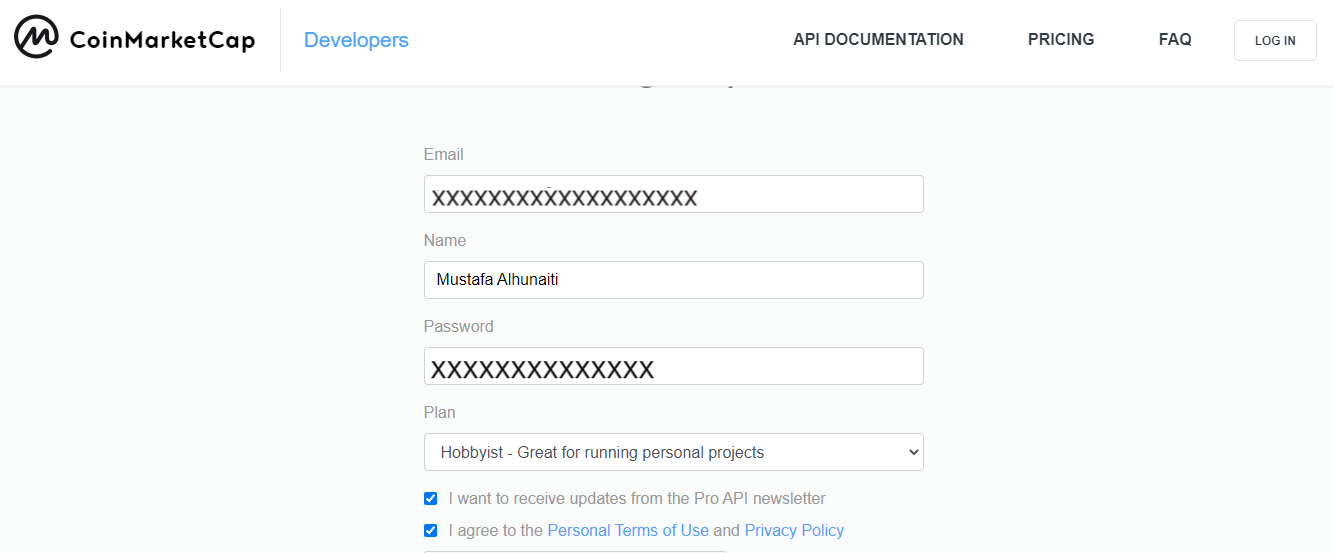

### After creating an account he will bring you here 
### Copy the Key via hover under the API key 
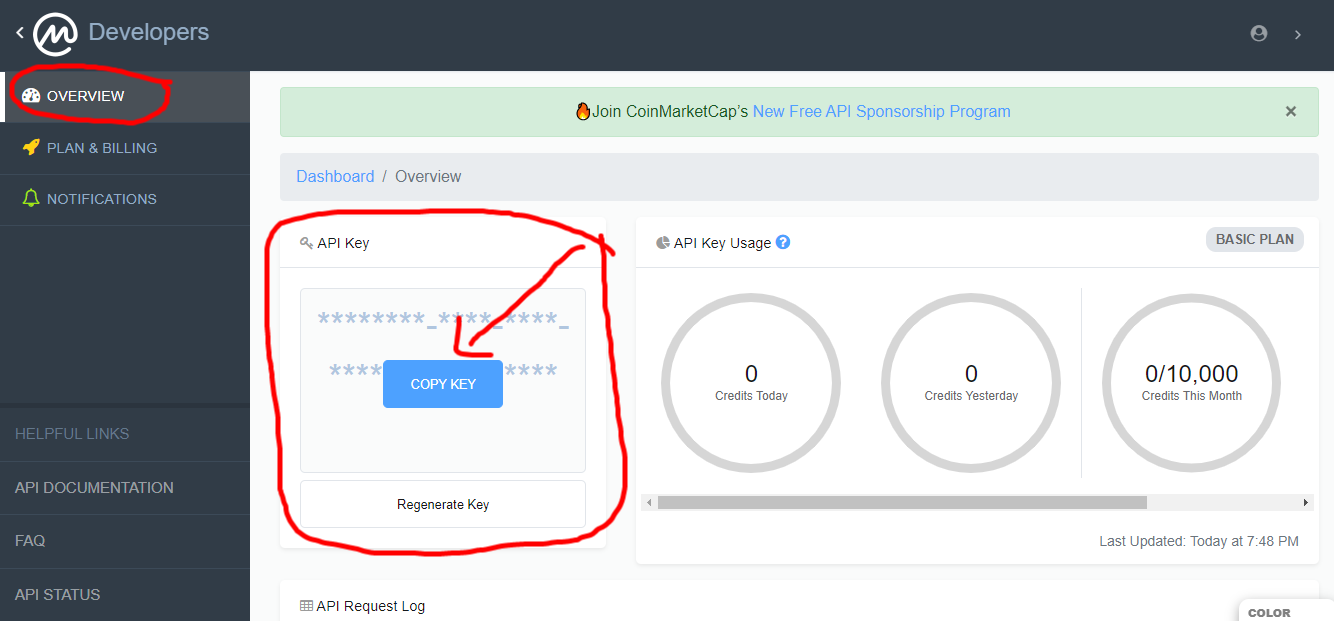

###  Before we continue, there is something really important to know which is the API documentation

### API documentation
#### one thing that you should always look for when you're using an API is the API documentation 

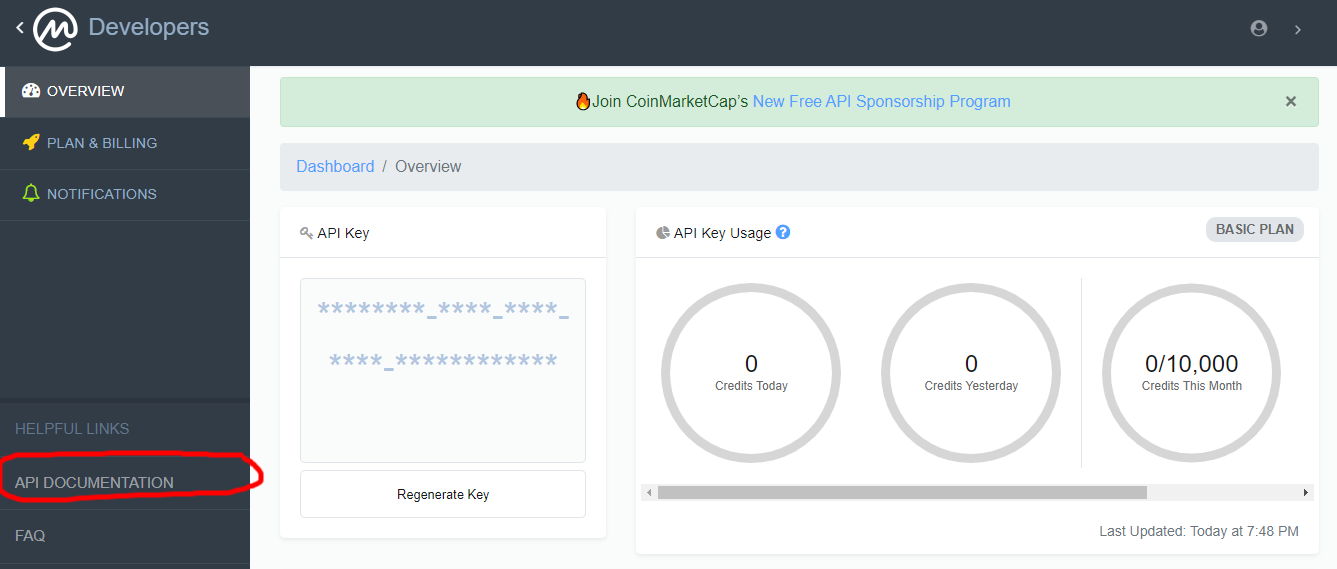

### Documentation for an API can be extremely important because not all APIs are set up exactly the same and so they're going to show you how to access it and how to use the keys it's really important that you read through this because they may have certain limitations or stipulations on how to use it  

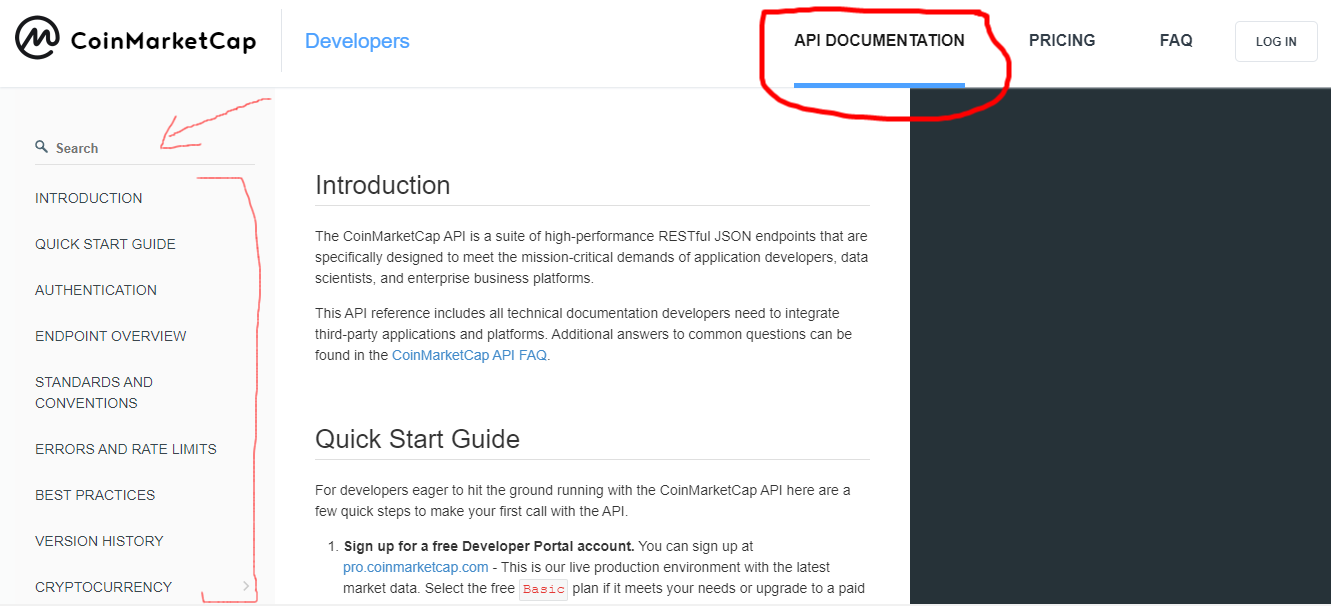

### I prefer to you read all the documentation.


### Copy the python code from  the documentation 👇 then put it on Jupyter Notebook
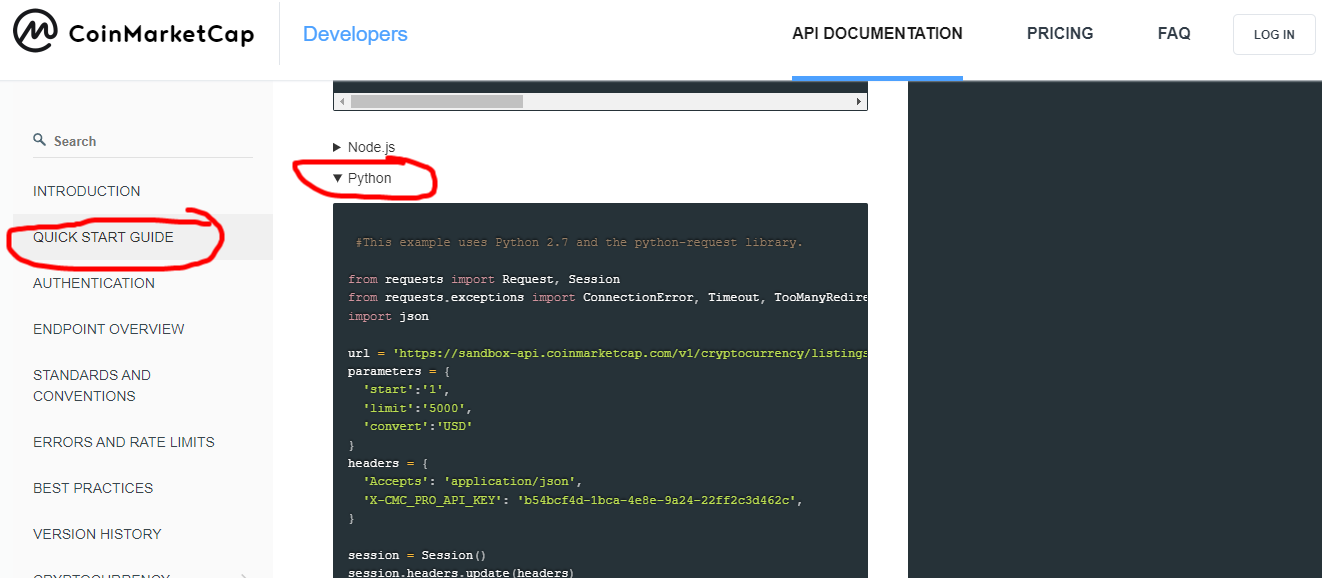

In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' # All requests should target domain https://pro-api.coinmarketcap.com
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '70c21e7a-d4cb-4e15-8618-9a47bdb71916', # here we will put our key between the Single Quotes 
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### You will get this Error when you try it for the first time 

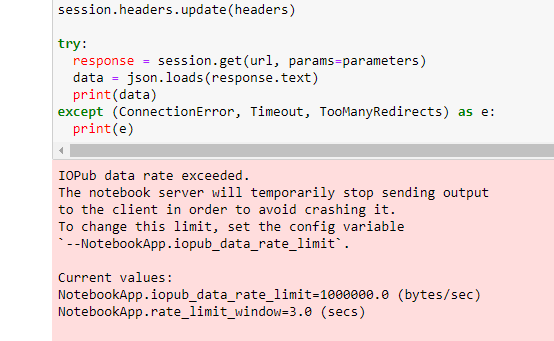

### i wanted to show you how to fix it

### what we need to do is actually increase the data rate limit 
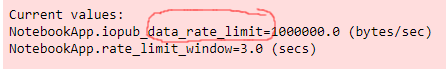

### so all we're going to do for that is we're going to search and we're going to say "anaconda prompt"
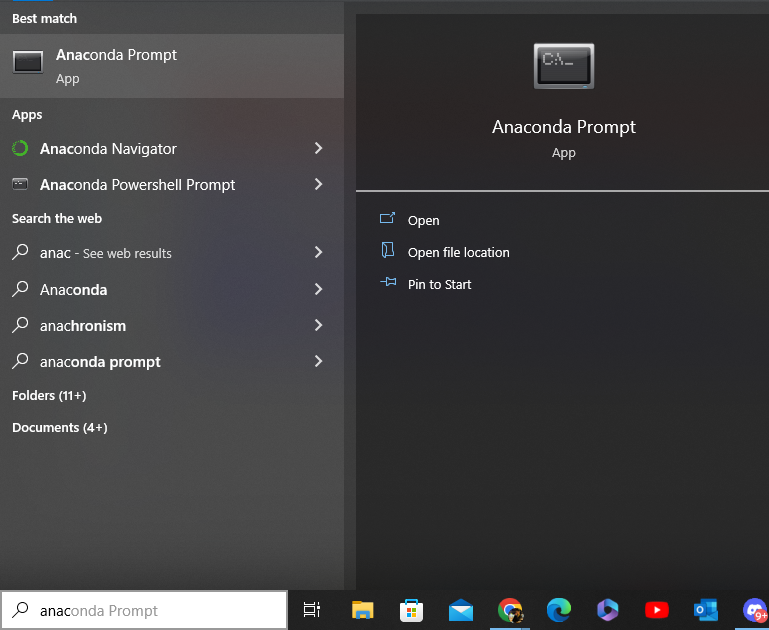

### we're going to increase the limit of the data that we can pull or increase our data rate limit 
#### put this in anaconda prompt  " jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000000 " then press enter
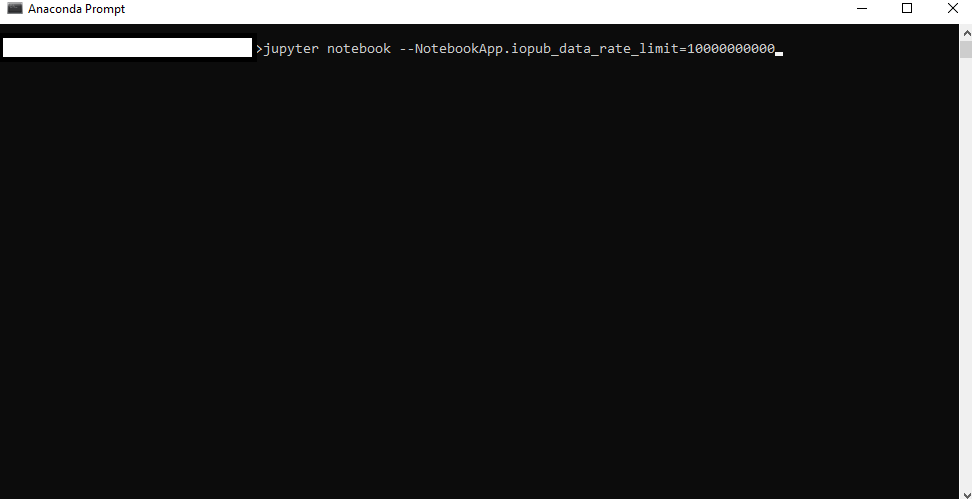

### Then copy this URL and put it on the browser
### the request will work after that  
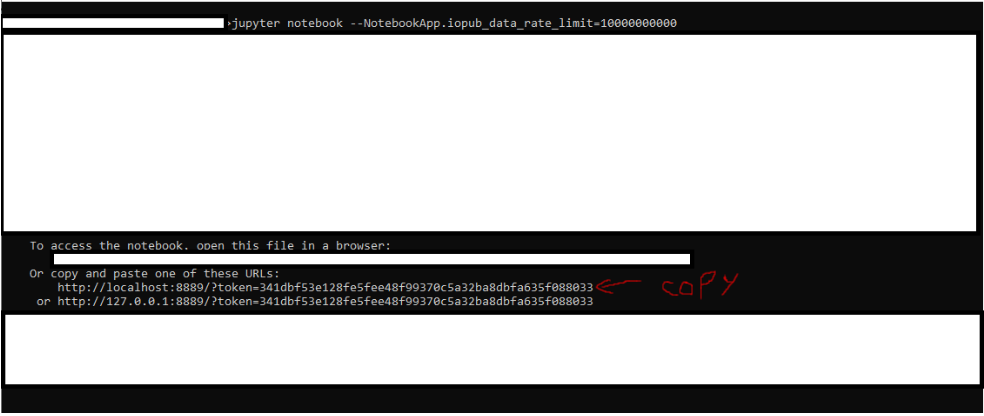

In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' # All requests should target domain https://pro-api.coinmarketcap.com
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '70c21e7a-d4cb-4e15-8618-9a47bdb71916', # here we will put our key between the Single Quotes 
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-05-29T18:44:38.040Z', 'error_code': 0, 'error_message': None, 'elapsed': 4207, 'credit_count': 25, 'notice': None, 'total_count': 10085}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10233, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', '

### This is actually in json format so use this json.loads.
### in order to get it kind of into usable state 
### json normalize  which is just going to make this look a lot prettier  basically we going to put it into data frame

In [2]:
type(data)

dict

In [7]:
import pandas as pd 


pd.set_option('display.max_columns', None) # display the max columns so after run this we can see every single column

In [8]:
pd.json_normalize(data['status'])

timestamp  error_code error_message  elapsed  credit_count  \
0  2023-05-29T18:44:38.040Z           0          None     4207            25   

  notice  total_count  
0   None        10085

In [11]:
pd.json_normalize(data['data'])

id         name  symbol         slug  num_market_pairs  \
0         1      Bitcoin     BTC      bitcoin             10233   
1      1027     Ethereum     ETH     ethereum              6955   
2       825       Tether    USDT       tether             54691   
3      1839          BNB     BNB          bnb              1427   
4      3408     USD Coin    USDC     usd-coin             12722   
...     ...          ...     ...          ...               ...   
4995  15747     MODA DAO    MODA     moda-dao                 8   
4996  24446  GoSleep NGT     NGT  gosleep-ngt                 3   
4997  25250       Pokmon  POKMON       pokmon                 3   
4998  21365  Aerarium Fi    AERA  aerarium-fi                 2   
4999  24382         Gold     KAU     gold-kau                 3   

                    date_added  \
0     2010-07-13T00:00:00.000Z   
1     2015-08-07T00:00:00.000Z   
2     2015-02-25T00:00:00.000Z   
3     2017-07-25T00:00:00.000Z   
4     2018-10-08T00:00:00.000Z   
...                        ...   
4995  2021-12-07T13:41:24.000Z   
4996  2023-04-13T15:33:18.000Z   
4997  2023-05-12T16:27:35.000Z   
4998  2022-08-12T12:49:45.000Z   
4999  2023-04-13T20:02:59.000Z   

                                                   tags    max_supply  \
0     [mineable, pow, sha-256, store-of-value, state...  2.100000e+07   
1     [pos, smart-contracts, ethereum-ecosystem, coi...           NaN   
2     [payments, stablecoin, asset-backed-stablecoin...           NaN   
3     [marketplace, centralized-exchange, payments, ...           NaN   
4     [medium-of-exchange, stablecoin, asset-backed-...           NaN   
...                                                 ...           ...   
4995                                            [music]  1.000000e+07   
4996                                                 []  0.000000e+00   
4997                                            [memes]  1.000000e+12   
4998                                                 []  9.999850e+05   
4999                                                 []  0.000000e+00   

      circulating_supply  total_supply  infinite_supply  platform  cmc_rank  \
0           1.938738e+07  1.938738e+07            False       NaN         1   
1           1.202543e+08  1.202543e+08             True       NaN         2   
2           8.312709e+10  8.609064e+10             True       NaN         3   
3           1.558569e+08  1.558569e+08            False       NaN         4   
4           2.904106e+10  2.904106e+10            False       NaN         5   
...                  ...           ...              ...       ...       ...   
4995        0.000000e+00  0.000000e+00            False       NaN      4995   
4996        0.000000e+00  0.000000e+00            False       NaN      4996   
4997        0.000000e+00  1.000000e+12            False       NaN      4997   
4998        0.000000e+00  9.999850e+05            False       NaN      4998   
4999        0.000000e+00  1.215263e+06            False       NaN      4999   

      self_reported_circulating_supply  self_reported_market_cap  tvl_ratio  \
0                                  NaN                       NaN        NaN   
1                                  NaN                       NaN        NaN   
2                                  NaN                       NaN        NaN   
3                                  NaN                       NaN        NaN   
4                                  NaN                       NaN        NaN   
...                                ...                       ...        ...   
4995                      7.944440e+05              3.118315e+05        NaN   
4996                      1.000000e+08              4.921404e+05        NaN   
4997                      1.000000e+12              1.706542e+05        NaN   
4998                      3.700000e+04              1.715017e+05        NaN   
4999                      1.237253e+06              7.743352e+07        NaN   

                  la